In [2]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=476deeae85b9211259f6cd2965adeb2fd0deaabb596aff629e1e2f340c01d93d
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [3]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelBinarizer



In [4]:
# Veri setini yükleyelim
dataset_path = '/content/drive/MyDrive/Colab Notebooks/balanced_milk.csv'
df = pd.read_csv(dataset_path)

In [5]:
# Girdi (X) ve çıktı (y) özelliklerini ayıralım
X = df.drop('Grade', axis=1)
y = df['Grade']


In [6]:
# Veriyi eğitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Standardize the dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour']])
scaled_df = pd.DataFrame(scaled_data, columns=['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour'])

In [8]:
# Bulanık giriş değişkenlerini tanımlama
pH = ctrl.Antecedent(np.arange(df['pH'].min(), df['pH'].max(), 0.1), 'pH')
Temprature = ctrl.Antecedent(np.arange(df['Temprature'].min(), df['Temprature'].max(), 0.1), 'Temprature')
Taste = ctrl.Antecedent(np.arange(df['Taste'].min(), df['Taste'].max(), 0.1), 'Taste')
Odor = ctrl.Antecedent(np.arange(df['Odor'].min(), df['Odor'].max(), 0.1), 'Odor')
Fat = ctrl.Antecedent(np.arange(df['Fat '].min(), df['Fat '].max(), 0.1), 'Fat ')
Turbidity = ctrl.Antecedent(np.arange(df['Turbidity'].min(), df['Turbidity'].max(), 0.1), 'Turbidity')
Colour = ctrl.Antecedent(np.arange(df['Colour'].min(), df['Colour'].max(), 0.1), 'Colour')


In [9]:
# Bulanık çıkış değişkenini tanımlama
Grade = ctrl.Consequent(np.arange(0, 3, 1), 'Grade')

In [10]:
# Üyelik fonksiyonlarını tanımlama
pH['low'] = fuzz.trapmf(pH.universe, [df['pH'].min(), df['pH'].min(), (df['pH'].min() + df['pH'].max()) / 2, df['pH'].max()])
pH['medium'] = fuzz.trapmf(pH.universe, [df['pH'].min(), (df['pH'].min() + df['pH'].max()) / 2, df['pH'].max(), df['pH'].max()])
pH['high'] = fuzz.trapmf(pH.universe, [(df['pH'].min() + df['pH'].max()) / 2, df['pH'].max(), df['pH'].max(), df['pH'].max()])

Temprature['low'] = fuzz.trapmf(Temprature.universe, [df['Temprature'].min(), df['Temprature'].min(), (df['Temprature'].min() + df['Temprature'].max()) / 2, df['Temprature'].max()])
Temprature['medium'] = fuzz.trapmf(Temprature.universe, [df['Temprature'].min(), (df['Temprature'].min() + df['Temprature'].max()) / 2, df['Temprature'].max(), df['Temprature'].max()])
Temprature['high'] = fuzz.trapmf(Temprature.universe, [(df['Temprature'].min() + df['Temprature'].max()) / 2, df['Temprature'].max(), df['Temprature'].max(), df['Temprature'].max()])

Taste['low'] = fuzz.trapmf(Taste.universe, [df['Taste'].min(), df['Taste'].min(), (df['Taste'].min() + df['Taste'].max()) / 2, df['Taste'].max()])
Taste['medium'] = fuzz.trapmf(Taste.universe, [df['Taste'].min(), (df['Taste'].min() + df['Taste'].max()) / 2, df['Taste'].max(), df['Taste'].max()])
Taste['high'] = fuzz.trapmf(Taste.universe, [(df['Taste'].min() + df['Taste'].max()) / 2, df['Taste'].max(), df['Taste'].max(), df['Taste'].max()])

Odor['low'] = fuzz.trapmf(Odor.universe, [df['Odor'].min(), df['Odor'].min(), (df['Odor'].min() + df['Odor'].max()) / 2, df['Odor'].max()])
Odor['medium'] = fuzz.trapmf(Odor.universe, [df['Odor'].min(), (df['Odor'].min() + df['Odor'].max()) / 2, df['Odor'].max(), df['Odor'].max()])
Odor['high'] = fuzz.trapmf(Odor.universe, [(df['Odor'].min() + df['Odor'].max()) / 2, df['Odor'].max(), df['Odor'].max(), df['Odor'].max()])

Fat['low'] = fuzz.trapmf(Fat.universe, [df['Fat '].min(), df['Fat '].min(), (df['Fat '].min() + df['Fat '].max()) / 2, df['Fat '].max()])
Fat['medium'] = fuzz.trapmf(Fat.universe, [df['Fat '].min(), (df['Fat '].min() + df['Fat '].max()) / 2, df['Fat '].max(), df['Fat '].max()])
Fat['high'] = fuzz.trapmf(Fat.universe, [(df['Fat '].min() + df['Fat '].max()) / 2, df['Fat '].max(), df['Fat '].max(), df['Fat '].max()])

Turbidity['low'] = fuzz.trapmf(Turbidity.universe, [df['Turbidity'].min(), df['Turbidity'].min(), (df['Turbidity'].min() + df['Turbidity'].max()) / 2, df['Turbidity'].max()])
Turbidity['medium'] = fuzz.trapmf(Turbidity.universe, [df['Turbidity'].min(), (df['Turbidity'].min() + df['Turbidity'].max()) / 2, df['Turbidity'].max(), df['Turbidity'].max()])
Turbidity['high'] = fuzz.trapmf(Turbidity.universe, [(df['Turbidity'].min() + df['Turbidity'].max()) / 2, df['Turbidity'].max(), df['Turbidity'].max(), df['Turbidity'].max()])

Colour['low'] = fuzz.trapmf(Colour.universe, [df['Colour'].min(), df['Colour'].min(), (df['Colour'].min() + df['Colour'].max()) / 2, df['Colour'].max()])
Colour['medium'] = fuzz.trapmf(Colour.universe, [df['Colour'].min(), (df['Colour'].min() + df['Colour'].max()) / 2, df['Colour'].max(), df['Colour'].max()])
Colour['high'] = fuzz.trapmf(Colour.universe, [(df['Colour'].min() + df['Colour'].max()) / 2, df['Colour'].max(), df['Colour'].max(), df['Colour'].max()])


In [11]:
#üyelik fonksiyonlarının çıkış değeri tanımlama
Grade['low'] = fuzz.trimf(Grade.universe, [0, 0, 1])
Grade['medium'] = fuzz.trimf(Grade.universe, [0, 1, 2])
Grade['high'] = fuzz.trimf(Grade.universe, [1, 2, 2])

In [15]:
# Bulanık kuralları tanımlama
rule1 = ctrl.Rule(pH['low'] & Temprature['low'] & Taste['low'], Grade['low'])
rule2 = ctrl.Rule(pH['medium'] & Temprature['medium'] & Taste['medium'], Grade['medium'])
rule3 = ctrl.Rule(pH['high'] & Temprature['high'] & Taste['high'], Grade['high'])

rule4 = ctrl.Rule(Odor['low'] & Fat['low'] & Turbidity['low'], Grade['low'])
rule5 = ctrl.Rule(Odor['medium'] & Fat['medium'] & Turbidity['medium'], Grade['medium'])
rule6 = ctrl.Rule(Odor['high'] & Fat['high'] & Turbidity['high'], Grade['high'])

rule7 = ctrl.Rule(pH['low'] & Temprature['low'] & Taste['low'] & Odor['low'] & Fat['low'] & Turbidity['low'] & Colour['low'],Grade['low'])
rule8 = ctrl.Rule(pH['medium'] & Temprature['medium'] & Taste['medium'] & Odor['medium'] & Fat['medium'] & Turbidity['medium'] & Colour['medium'],Grade['medium'])
rule9 = ctrl.Rule(pH['high'] & Temprature['high'] & Taste['high'] & Odor['high'] & Fat['high'] & Turbidity['high'] & Colour['high'],Grade['high'])

rule10 = ctrl.Rule(Odor['low'] & Fat['low'] & pH['low'], Grade['low'])
rule11 = ctrl.Rule(Odor['medium'] & Fat['medium'] & pH['medium'], Grade['medium'])
rule12 = ctrl.Rule(Odor['high'] & Fat['high'] & pH['high'], Grade['high'])

rule13 = ctrl.Rule(Odor['low'] & Fat['low'] & Temprature['low'], Grade['low'])
rule14 = ctrl.Rule(Odor['medium'] & Fat['medium'] & Temprature['medium'], Grade['medium'])
rule15 = ctrl.Rule(Odor['high'] & Fat['high'] & Temprature['high'], Grade['high'])

rule16 = ctrl.Rule(Odor['low'] & Fat['low'] & Taste['low'], Grade['low'])
rule17 = ctrl.Rule(Odor['medium'] & Fat['medium'] & Taste['medium'], Grade['medium'])
rule18 = ctrl.Rule(Odor['high'] & Fat['high'] & Taste['high'], Grade['high'])

rule19 = ctrl.Rule(pH['low'] & Temprature['low'] & Odor['low'], Grade['low'])
rule20 = ctrl.Rule(pH['medium'] & Temprature['medium'] & Odor['medium'], Grade['medium'])
rule21 = ctrl.Rule(pH['high'] & Temprature['high'] & Odor['high'], Grade['high'])

rule22 = ctrl.Rule(pH['low'] & Temprature['low'] & Fat['low'], Grade['low'])
rule23 = ctrl.Rule(pH['medium'] & Temprature['medium'] & Fat['medium'], Grade['medium'])
rule24 = ctrl.Rule(pH['high'] & Temprature['high'] & Fat['high'], Grade['high'])

rule25 = ctrl.Rule(pH['low'] & Temprature['low'] & Turbidity['low'], Grade['low'])
rule26 = ctrl.Rule(pH['medium'] & Temprature['medium'] & Turbidity['medium'], Grade['medium'])
rule27 = ctrl.Rule(pH['high'] & Temprature['high'] & Turbidity['high'], Grade['high'])

rule28 = ctrl.Rule(pH['low'] & Odor['low'] & Taste['low'], Grade['low'])
rule29 = ctrl.Rule(pH['medium'] & Odor['medium'] & Taste['medium'], Grade['medium'])
rule30 = ctrl.Rule(pH['high'] & Odor['high'] & Taste['high'], Grade['high'])

rule31 = ctrl.Rule(pH['low'] & Fat['low'] & Taste['low'], Grade['low'])
rule32 = ctrl.Rule(pH['medium'] & Fat['medium'] & Taste['medium'], Grade['medium'])
rule33 = ctrl.Rule(pH['high'] & Fat['high'] & Taste['high'], Grade['high'])

rule34 = ctrl.Rule(pH['low'] & Turbidity['low'] & Taste['low'], Grade['low'])
rule35 = ctrl.Rule(pH['medium'] & Turbidity['medium'] & Taste['medium'], Grade['medium'])
rule36 = ctrl.Rule(pH['high'] & Turbidity['high'] & Taste['high'], Grade['high'])

rule37 = ctrl.Rule(pH['low'] & Odor['low'] & Turbidity['low'], Grade['low'])
rule38 = ctrl.Rule(pH['medium'] & Odor['medium'] & Turbidity['medium'], Grade['medium'])
rule39 = ctrl.Rule(pH['high'] & Odor['high'] & Turbidity['high'], Grade['high'])

rule40 = ctrl.Rule(Odor['low'] & Fat['low'] & Colour['low'], Grade['low'])
rule41 = ctrl.Rule(Odor['medium'] & Fat['medium'] & Colour['medium'], Grade['medium'])
rule42 = ctrl.Rule(Odor['high'] & Fat['high'] & Colour['high'], Grade['high'])

rule43 = ctrl.Rule(Taste['low'] & Turbidity['low'] & Colour['low'], Grade['low'])
rule44 = ctrl.Rule(Taste['medium'] & Turbidity['medium'] & Colour['medium'], Grade['medium'])
rule45 = ctrl.Rule(Taste['high'] & Turbidity['high'] & Colour['high'], Grade['high'])

rule46 = ctrl.Rule(pH['low'] & Fat['low'] & Colour['low'], Grade['low'])
rule47 = ctrl.Rule(pH['medium'] & Fat['medium'] & Colour['medium'], Grade['medium'])
rule48 = ctrl.Rule(pH['high'] & Fat['high'] & Colour['high'], Grade['high'])

rule49 = ctrl.Rule(pH['low'] & Odor['low'] & Colour['low'], Grade['low'])
rule50 = ctrl.Rule(pH['medium'] & Odor['medium'] & Colour['medium'], Grade['medium'])
rule51 = ctrl.Rule(pH['high'] & Odor['high'] & Colour['high'], Grade['high'])

rule52 = ctrl.Rule(Temprature['low'] & Fat['low'] & Colour['low'], Grade['low'])
rule53 = ctrl.Rule(Temprature['medium'] & Fat['medium'] & Colour['medium'], Grade['medium'])
rule54 = ctrl.Rule(Temprature['high'] & Fat['high'] & Colour['high'], Grade['high'])

rule55 = ctrl.Rule(Temprature['low'] & Taste['low'] & Colour['low'], Grade['low'])
rule56 = ctrl.Rule(Temprature['medium'] & Taste['medium'] & Colour['medium'], Grade['medium'])
rule57 = ctrl.Rule(Temprature['high'] & Taste['high'] & Colour['high'], Grade['high'])

rule58 = ctrl.Rule(pH['low'] & Temprature['low'] & Taste['low'] & Fat['low'] ,Grade['low'])
rule59 = ctrl.Rule(pH['medium'] & Temprature['medium'] & Taste['medium']  & Fat['medium'] ,Grade['medium'])
rule60 = ctrl.Rule(pH['high'] & Temprature['high'] & Taste['high']& Fat['high'] ,Grade['high'])

rule61 = ctrl.Rule(pH['low'] & Temprature['low'] & Taste['low'] & Fat['low'] & Turbidity['low'], Grade['low'])
rule62 = ctrl.Rule(pH['medium'] & Temprature['medium'] & Taste['medium']  & Fat['medium']  & Turbidity['medium'],Grade['medium'])
rule63 = ctrl.Rule(pH['high'] & Temprature['high'] & Taste['high']& Fat['high'] & Turbidity['high'],Grade['high'])

rule64 = ctrl.Rule(pH['low'] & Temprature['low'] & Taste['low'] & Odor['low'] ,Grade['low'])
rule65 = ctrl.Rule(pH['medium'] & Temprature['medium'] & Taste['medium']  & Odor['medium'] ,Grade['medium'])
rule66 = ctrl.Rule(pH['high'] & Temprature['high'] & Taste['high']& Odor['high'] ,Grade['high'])







In [16]:
# Kontrol sistemi oluşturma
rules_dict = {f'rule{i}': eval(f'rule{i}') for i in range(1, 67)}
rules = [rules_dict[f'rule{i}'] for i in range(1, 67)]
grade_ctrl = ctrl.ControlSystem(rules)
#grade_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
grade_sim = ctrl.ControlSystemSimulation(grade_ctrl)


In [17]:
print(grade_sim.input)

pH : None
Temprature : None
Taste : None
Odor : None
Fat  : None
Turbidity : None
Colour : None



In [18]:
# Train the ANFIS model
for i in range(len(X_train)):
    grade_sim.input['pH'] = X_train.iloc[i, 0]
    grade_sim.input['Temprature'] = X_train.iloc[i, 1]
    grade_sim.input['Taste'] = X_train.iloc[i, 2]
    grade_sim.input['Odor'] = X_train.iloc[i, 3]
    grade_sim.input['Fat '] = X_train.iloc[i, 4]
    grade_sim.input['Turbidity'] = X_train.iloc[i, 5]
    grade_sim.input['Colour'] = X_train.iloc[i, 6]
    grade_sim.compute()
    print(f"Iterasyon {i} için çıktı: {grade_sim.output['Grade']}")

# Test the model
predictions = []
for i in range(len(X_test)):
    grade_sim.input['pH'] = X_test.iloc[i, 0]
    grade_sim.input['Temprature'] = X_test.iloc[i, 1]
    grade_sim.input['Taste'] = X_test.iloc[i, 2]
    grade_sim.input['Odor'] = X_test.iloc[i, 3]
    grade_sim.input['Fat '] = X_test.iloc[i, 4]
    grade_sim.input['Turbidity'] = X_test.iloc[i, 5]
    grade_sim.input['Colour'] = X_test.iloc[i, 6]
    grade_sim.compute()
    predictions.append(grade_sim.output['Grade'])
    print(f"Predicted: {grade_sim.output['Grade']}")


Iterasyon 0 için çıktı: 1.134246575342466
Iterasyon 1 için çıktı: 0.9924102564102564
Iterasyon 2 için çıktı: 1.1207196790310248
Iterasyon 3 için çıktı: 0.3333333333333333
Iterasyon 4 için çıktı: 0.9924102564102564
Iterasyon 5 için çıktı: 0.3333333333333333
Iterasyon 6 için çıktı: 1.134246575342466
Iterasyon 7 için çıktı: 0.987718474813483
Iterasyon 8 için çıktı: 0.8522760973175193
Iterasyon 9 için çıktı: 0.813536298034363
Iterasyon 10 için çıktı: 0.3333333333333333
Iterasyon 11 için çıktı: 0.9924102564102564
Iterasyon 12 için çıktı: 0.9852515246470569
Iterasyon 13 için çıktı: 1.134246575342466
Iterasyon 14 için çıktı: 0.8253013743035211
Iterasyon 15 için çıktı: 0.9924102564102564
Iterasyon 16 için çıktı: 1.134246575342466
Iterasyon 17 için çıktı: 1.134246575342466
Iterasyon 18 için çıktı: 0.5833333333333333
Iterasyon 19 için çıktı: 1.134246575342466
Iterasyon 20 için çıktı: 0.846743295019157
Iterasyon 21 için çıktı: 0.9581560283687943
Iterasyon 22 için çıktı: 0.9581560283687943
Iterasy

In [19]:
# Evaluate the model
y_true = y_test  # Actual values
#y_pred = np.round(predictions).astype(int)  # Predictions

# Liste yerine NumPy dizisi kullanarak işlem yapma
predictions_np = np.array(predictions)

# Bulanık mantık kurallarına göre yuvarlama işlemi
y_pred = np.where(predictions_np < 0.5, 0, np.where(predictions_np < 1.5, 1, 2)).astype(int)
print(y_pred)  # Sonucu yazdır

[1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1]


In [20]:
# Ensure that all classes are represented in the predictions
unique_predictions = np.unique(y_pred)
print(f"Unique predictions: {unique_predictions}")  # Debugging: Check unique predictions


Unique predictions: [0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.2713
Precision: 0.4660
Recall: 0.2713
F1 Score: 0.1437

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        83
           1       0.32      0.88      0.46        80
           2       0.00      0.00      0.00        95

    accuracy                           0.27       258
   macro avg       0.11      0.29      0.15       258
weighted avg       0.10      0.27      0.14       258



<Figure size 800x600 with 0 Axes>

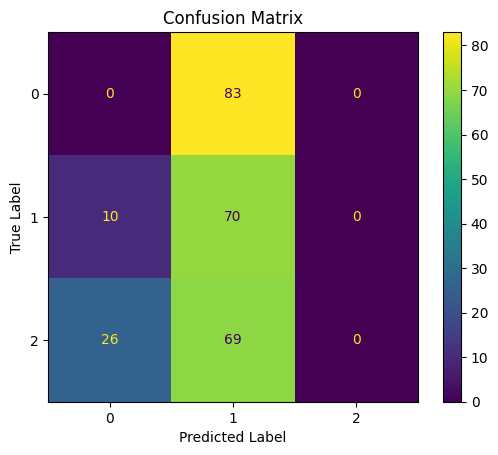

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Değerlendirme metriklerini hesaplama
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_true, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_true, y_pred, average='weighted', zero_division=1)
cm = confusion_matrix(y_true, y_pred)
cm_df = pd.DataFrame(cm, index=np.unique(y), columns=np.unique(y))

# Classification report (opsiyonel)
class_report = classification_report(y_true, y_pred)

# Değerleri yazdırma
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
class_names = ['0','1','2']

# Classification report'ı yazdırma (opsiyonel)
print("\nClassification Report:")
print(class_report)

# Seaborn heatmap ile görselleştirme
plt.figure(figsize=(8, 6))
#sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
disp.plot()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
